# Importing the standard packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data sets

In [2]:
df_test = pd.read_csv('~/Data/Insight_DS/Data_Challenges/Pricing_Test/test_results.csv')

In [3]:
df_test.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0


### Converting the time stamps to datetimes

In [4]:
#df['timestamp'] = df['timestamp'].apply(pd.to_datetime)
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], errors ='coerce')

In [5]:
df_test.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0


In [6]:
df_user = pd.read_csv('~/Data/Insight_DS/Data_Challenges/Pricing_Test/user_table.csv')

In [7]:
df_user.head(2)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82


In [8]:
print(df_test.shape)
print(df_user.shape)

(316800, 8)
(275616, 5)


## Merging the two data frames and calling it df

In [9]:
# Merging the two data frames together
df = pd.merge(df_test, df_user, on='user_id')

In [10]:
print(df.shape)

(275616, 12)


In [11]:
df.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24


# Exploratory Data Analysis

In [12]:
df.dtypes

user_id                      int64
timestamp           datetime64[ns]
source                      object
device                      object
operative_system            object
test                         int64
price                        int64
converted                    int64
city                        object
country                     object
lat                        float64
long                       float64
dtype: object

## Total number of sales for control and test case

Let's look at what percent converted and the price revenue per person who visited

In [24]:
# Above was the first was I did it... wanted to know about time range... 
# Now, doing it in more elegant way

total = df.pivot_table(index='test',
                    aggfunc={'converted':len})

converted = df.pivot_table(index='test',
                    aggfunc={'converted':sum})

In [25]:
(converted / total) * 100

,converted
test,
0,1.977577
1,1.542525


## Assuiming this conversion rate...

How much revenue would they expect from 10,000 customers?

In [29]:
control_conversion = (3489/176428)*100
test_conversion = (1530/99188)*100

In [30]:
# Multiply rate by 1,000 customers
control_revenue = (control_conversion * 1000) * 39
test_revenue = (test_conversion * 1000) * 59
print("Control_Revenue: {:.2f}".format(control_revenue))
print("Test_Revenue: {:.2f}".format(test_revenue))

Control_Revenue: 77125.51
Test_Revenue: 91008.99


Let's look at revenue as a function of the number of converstions

/Users/baile450/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


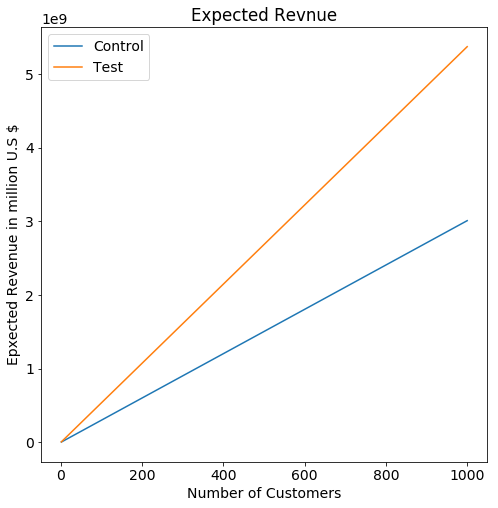

In [42]:
x = range(1,1001)
control_profits = ((control_revenue * np.arange(1,1001))*39)
test_profits = ((test_revenue * np.arange(1,1001))*59)

plt.figure(figsize=(8,8))
plt.plot(x, control_profits)
plt.plot(x, test_profits)
plt.legend(['Control','Test'])
plt.rcParams.update({'font.size': 14})

plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue in million U.S $')
plt.title('Expected Revnue')
plt.legend()

# Format axis labels and get y label units out of Sci Notation or label what it is....

## Exploring different segements using this same analysis

In [44]:
df.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73


In [45]:
# Creating a pivot table to get the number of potential customers and the # of conversions
total_os = df.pivot_table(index='test', columns = 'operative_system', 
                    aggfunc={'converted':len})

converted_os = df.pivot_table(index='test',columns = 'operative_system', 
                    aggfunc={'converted':sum})

In [46]:
total_os

converted                                  
operative_system   android    iOS linux    mac other windows
test                                                        
0                    42008  53761  1932  14296  9203   55228
1                    23297  29221  1702   7535  4940   32493

In [47]:
converted_os

converted                               
operative_system   android   iOS linux  mac other windows
test                                                     
0                      672  1263    31  378   123    1022
1                      297   584     0  153    51     445

In [48]:
type(converted_os)

pandas.core.frame.DataFrame

In [49]:
(converted_os / total_os) * 100

converted                                                  
operative_system   android       iOS     linux       mac     other   windows
test                                                                        
0                 1.599695  2.349287  1.604555  2.644096  1.336521  1.850511
1                 1.274842  1.998563  0.000000  2.030524  1.032389  1.369526

In [50]:
# Lets think about the overall number of potential customers per operating system to have perspective
os_counts = df.groupby('operative_system').count()
os_counts

,user_id,timestamp,source,device,test,price,converted,city,country,lat,long
operative_system,,,,,,,,,,,
android,65305,63055,65305,65305,65305,65305,65305,65305,65305,65305,65305
iOS,82982,80373,82982,82982,82982,82982,82982,82982,82982,82982,82982
linux,3634,3508,3634,3634,3634,3634,3634,3634,3634,3634,3634
mac,21831,21175,21831,21831,21831,21831,21831,21831,21831,21831,21831
other,14143,13682,14143,14143,14143,14143,14143,14143,14143,14143,14143
windows,87721,84863,87721,87721,87721,87721,87721,87721,87721,87721,87721


In [51]:
os_counts['user_id']

operative_system
android    65305
iOS        82982
linux       3634
mac        21831
other      14143
windows    87721
Name: user_id, dtype: int64

In [52]:
os_counts.columns

Index(['user_id', 'timestamp', 'source', 'device', 'test', 'price',
       'converted', 'city', 'country', 'lat', 'long'],
      dtype='object')

In [54]:
lab = os_counts.columns
lab

Index(['user_id', 'timestamp', 'source', 'device', 'test', 'price',
       'converted', 'city', 'country', 'lat', 'long'],
      dtype='object')

In [55]:
type(lab)

pandas.core.indexes.base.Index

In [56]:
lab = ['android','iOS','linux','mac','other','windows']

In [57]:
type(lab)

list

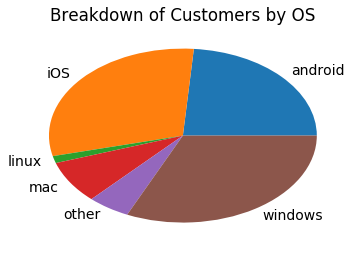

In [59]:
plt.pie(os_counts['user_id'],labels = lab)
plt.rcParams.update({'font.size': 14})
plt.title('Breakdown of Customers by OS')

In [60]:
conversion_rates_os = (converted_os / total_os) * 100
conversion_rates_os

converted                                                  
operative_system   android       iOS     linux       mac     other   windows
test                                                                        
0                 1.599695  2.349287  1.604555  2.644096  1.336521  1.850511
1                 1.274842  1.998563  0.000000  2.030524  1.032389  1.369526

<strong> Insight: <br> Mac is a potential area of opportunity considering it has some of the highest conversion rates, but makes up a small part of their overall market

In [61]:
conversion_rates_os.columns

MultiIndex(levels=[['converted'], ['android', 'iOS', 'linux', 'mac', 'other', 'windows']],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]],
           names=[None, 'operative_system'])

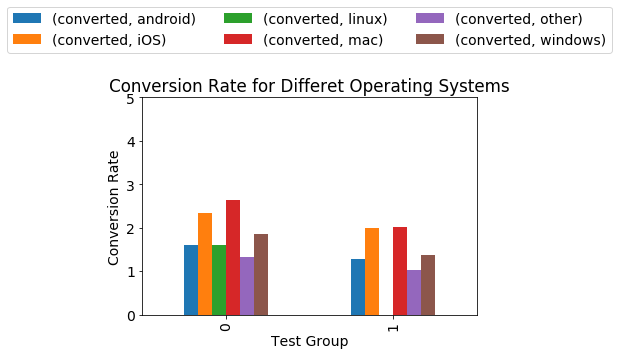

In [63]:
conversion_rates_os.plot.bar()
plt.ylim(0,5)
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate for Differet Operating Systems')
plt.rcParams.update({'font.size': 14})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)

In [64]:
conversion_rates_os['converted','android']

test
0    1.599695
1    1.274842
Name: (converted, android), dtype: float64

In [65]:
android = conversion_rates_os['converted','android']
ios = conversion_rates_os['converted','iOS']
linix = conversion_rates_os['converted','linux']
mac = conversion_rates_os['converted','mac']
other = conversion_rates_os['converted','other']
windows = conversion_rates_os['converted','windows']

In [66]:
android[1]

1.2748422543675151

/Users/baile450/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


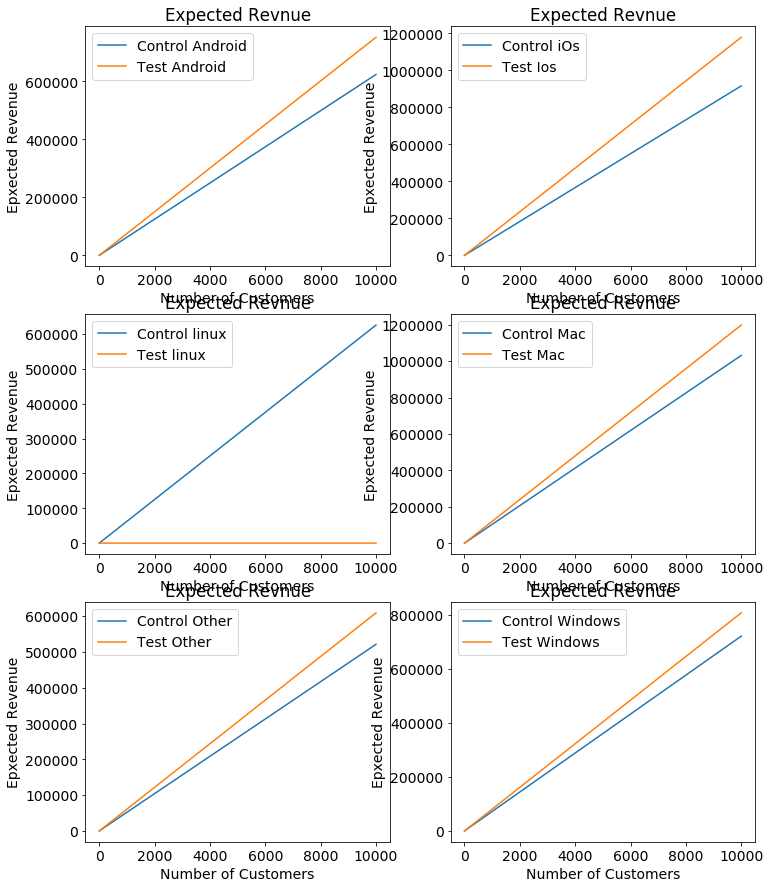

In [67]:
x = range(1,10001)

plt.figure(figsize=(12,15))

# Android
plt.subplot(3,2,1)
control_android = ((android[0] * np.arange(1,10001))*39)
test_android = ((android[1] * np.arange(1,10001))*59)

plt.plot(x, control_android)
plt.plot(x, test_android)
plt.legend(['Control Android','Test Android'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()


# Android
plt.subplot(3,2,2)
control_ios = ((ios[0] * np.arange(1,10001))*39)
test_ios = ((ios[1] * np.arange(1,10001))*59)

plt.plot(x, control_ios)
plt.plot(x, test_ios)
plt.legend(['Control iOs','Test Ios'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()


# linix
plt.subplot(3,2,3)
control_linix = ((linix[0] * np.arange(1,10001))*39)
test_linix = ((linix[1] * np.arange(1,10001))*59)

plt.plot(x, control_linix)
plt.plot(x, test_linix)
plt.legend(['Control linux','Test linux'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()


# mac
plt.subplot(3,2,4)
control_mac = ((mac[0] * np.arange(1,10001))*39)
test_mac = ((mac[1] * np.arange(1,10001))*59)

plt.plot(x, control_mac)
plt.plot(x, test_mac)
plt.legend(['Control Mac','Test Mac'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()


# other
plt.subplot(3,2,5)
control_other = ((other[0] * np.arange(1,10001))*39)
test_other = ((other[1] * np.arange(1,10001))*59)

plt.plot(x, control_other)
plt.plot(x, test_other)
plt.legend(['Control Other','Test Other'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()


# Windows
plt.subplot(3,2,6)
control_windows = ((windows[0] * np.arange(1,10001))*39)
test_windows = ((windows[1] * np.arange(1,10001))*59)

plt.plot(x, control_windows)
plt.plot(x, test_windows)
plt.legend(['Control Windows','Test Windows'])
plt.xlabel('Number of Customers')
plt.ylabel('Epxected Revenue')
plt.title('Expected Revnue')
plt.legend()

# Format axis labels and get y label units out of Sci Notation or label what it is....

In [68]:
conversion_rates_os

converted                                                  
operative_system   android       iOS     linux       mac     other   windows
test                                                                        
0                 1.599695  2.349287  1.604555  2.644096  1.336521  1.850511
1                 1.274842  1.998563  0.000000  2.030524  1.032389  1.369526

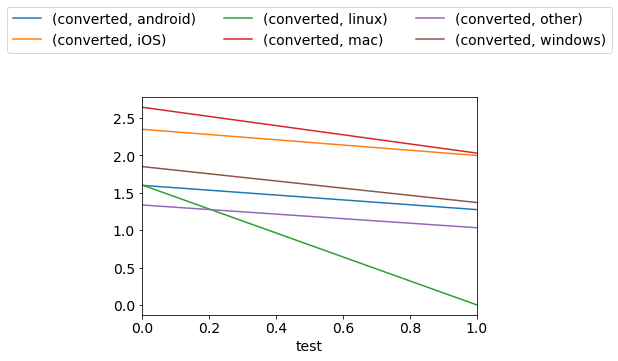

In [70]:
conversion_rates_os.plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)

# Analysis by advertising source

In [71]:
# Creating a pivot table to get the number of potential customers and the # of conversions
total_add = df.pivot_table(index='test', columns = 'source', 
                    aggfunc={'converted':len})

converted_add = df.pivot_table(index='test',columns = 'source', 
                    aggfunc={'converted':sum})

(converted_add / total_add) * 100

converted                                                             \
source  ads-bing ads-google ads-yahoo ads_facebook ads_other direct_traffic   
test                                                                          
0       1.324190   2.253238  1.584634     2.359623  1.507597       1.346353   
1       0.972222   1.931514  1.244297     1.698046  1.310091       0.978775   

                                                                              
source friend_referral  seo-bing seo-google seo-other seo-yahoo seo_facebook  
test                                                                          
0             4.138957  2.761001   1.764393  1.792324  1.983816     1.716811  
1             3.190035  1.118881   1.583904  1.230769  1.079812     1.356791

Friend referral is a very good approach. Should make plans to increase that avenue further yet. 

In [72]:
conversion_rates_add = (converted_add / total_add) * 100
conversion_rates_add

converted                                                             \
source  ads-bing ads-google ads-yahoo ads_facebook ads_other direct_traffic   
test                                                                          
0       1.324190   2.253238  1.584634     2.359623  1.507597       1.346353   
1       0.972222   1.931514  1.244297     1.698046  1.310091       0.978775   

                                                                              
source friend_referral  seo-bing seo-google seo-other seo-yahoo seo_facebook  
test                                                                          
0             4.138957  2.761001   1.764393  1.792324  1.983816     1.716811  
1             3.190035  1.118881   1.583904  1.230769  1.079812     1.356791

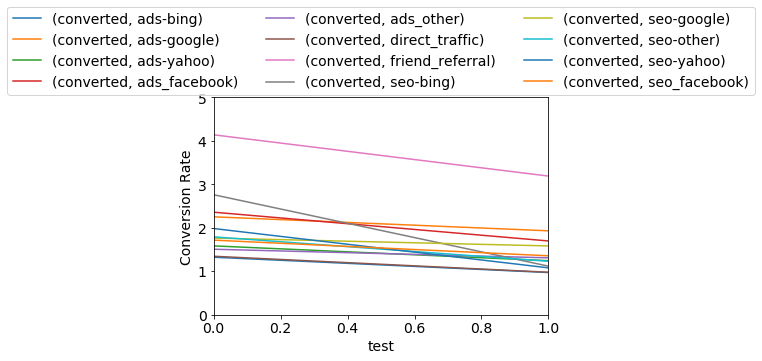

In [74]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

plt.figure(figsize=(12,8))
conversion_rates_add.plot()
plt.ylim(0,5)
plt.ylabel('Conversion Rate')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)


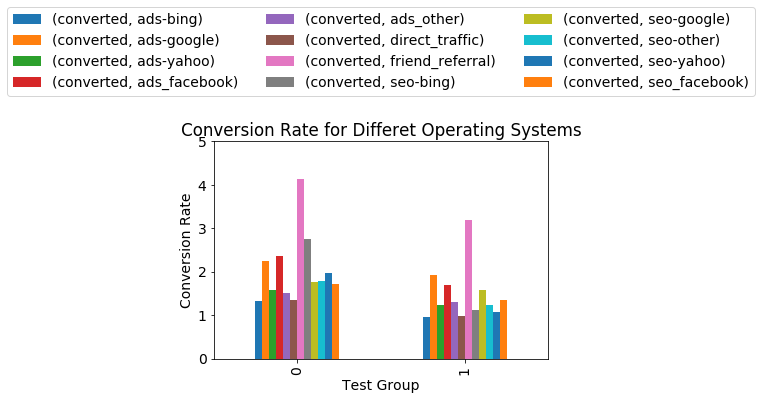

In [76]:
conversion_rates_add.plot.bar()
plt.ylim(0,5)
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate for Differet Operating Systems')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.65),
          ncol=3, fancybox=True)
plt.rcParams.update({'font.size': 14})



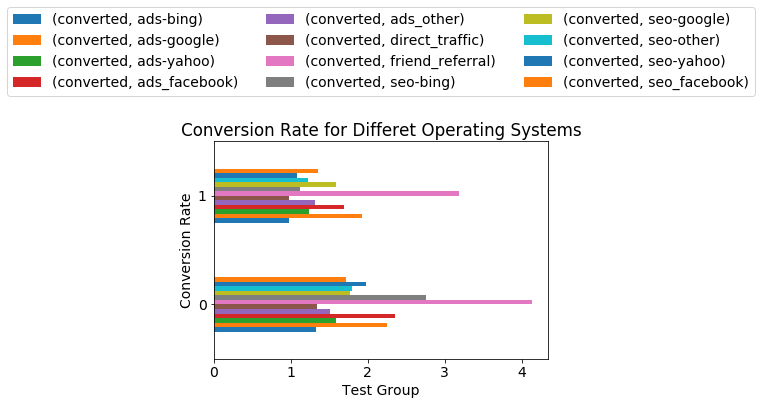

In [77]:
conversion_rates_add.plot.barh()
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate for Differet Operating Systems')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.65),
          ncol=3, fancybox=True)
plt.rcParams.update({'font.size': 14})


# How long should test have gone

In [78]:
df.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73


In [79]:
df.dtypes

user_id                      int64
timestamp           datetime64[ns]
source                      object
device                      object
operative_system            object
test                         int64
price                        int64
converted                    int64
city                        object
country                     object
lat                        float64
long                       float64
dtype: object

In [80]:
df[df['timestamp'] < '2015-03-10'].head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
15,692331,2015-03-08 13:19:55,ads-google,mobile,iOS,0,39,0,Deerfield Beach,USA,26.31,-80.12
17,817127,2015-03-04 15:52:29,ads_facebook,mobile,iOS,0,39,0,Sheboygan,USA,43.75,-87.73
21,833161,2015-03-05 11:32:28,direct_traffic,mobile,android,1,59,0,Waukegan,USA,42.37,-87.87


## Would 5 days have been enough?

In [81]:
df['timestamp'].min()

Timestamp('2015-03-02 00:04:12')

In [82]:
df_5day = df[df['timestamp'] < '2015-03-8']
df_10day = df[df['timestamp'] < '2015-03-13']
df_15day = df[df['timestamp'] < '2015-03-18']
df_20day = df[df['timestamp'] < '2015-03-23']


df_5day.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
17,817127,2015-03-04 15:52:29,ads_facebook,mobile,iOS,0,39,0,Sheboygan,USA,43.75,-87.73
21,833161,2015-03-05 11:32:28,direct_traffic,mobile,android,1,59,0,Waukegan,USA,42.37,-87.87
44,196245,2015-03-07 08:11:46,friend_referral,mobile,iOS,0,39,0,Pahrump,USA,36.20,-115.99


In [83]:
# Creating a pivot table to get the number of potential customers and the # of conversions
total_5d = df_5day.pivot_table(index='test', 
                    aggfunc={'converted':len})

converted_5d = df_5day.pivot_table(index='test', 
                    aggfunc={'converted':sum})

(converted_5d / total_5d) * 100

,converted
test,
0,2.143056
1,1.790365


In [84]:
# Creating a pivot table to get the number of potential customers and the # of conversions
total_10d = df_10day.pivot_table(index='test', 
                    aggfunc={'converted':len})
total_15d = df_15day.pivot_table(index='test', 
                    aggfunc={'converted':len})
total_20d = df_20day.pivot_table(index='test', 
                    aggfunc={'converted':len})

converted_10d = df_10day.pivot_table(index='test', 
                    aggfunc={'converted':sum})
converted_15d = df_15day.pivot_table(index='test', 
                    aggfunc={'converted':sum})
converted_20d = df_20day.pivot_table(index='test', 
                    aggfunc={'converted':sum})

(converted_10d / total_10d) * 100
(converted_15d / total_15d) * 100
(converted_20d / total_20d) * 100

,converted
test,
0,1.982290
1,1.691533


In [85]:
conversion_rates_5d = (converted_5d / total_5d) * 100
conversion_rates_5d

,converted
test,
0,2.143056
1,1.790365


In [86]:
conversion_rates_10d = (converted_10d / total_10d) * 100
conversion_rates_15d = (converted_15d / total_15d) * 100
conversion_rates_20d = (converted_20d / total_20d) * 100


In [87]:
conversion_rates = (converted / total) * 100
conversion_rates

,converted
test,
0,1.977577
1,1.542525


In [88]:
conversion_rates_5d

,converted
test,
0,2.143056
1,1.790365


In [89]:
conversion_rates_10d

,converted
test,
0,2.109974
1,1.715585


In [90]:
conversion_rates_15d

,converted
test,
0,1.989607
1,1.635649


In [91]:
conversion_rates_20d

,converted
test,
0,1.982290
1,1.691533
